In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.api import VAR, DynamicVAR

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census', 'mobile']
area_list = [str(i) for i in range(81)]

In [4]:
csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            for _area in area_list:
                df = pd.read_csv(root_dir+ 'datetime_per_area/' + _dir + 'seed' + _seed + '_' + _csv + _area + '.csv',
                                                    index_col=0,
                                                    encoding='Shift_JISx0213')
                csv_array[_dir][_seed][_csv][_area] = df

In [5]:
people = 'people30000'
seed = '123'
csv = 'census'
area = '40'

In [6]:
df = csv_array[people][seed][csv][area].copy()
df['ds'] = [i for i in range(6)]
df
model = VAR(df)
result = model.fit(2)
# result.summary()

/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


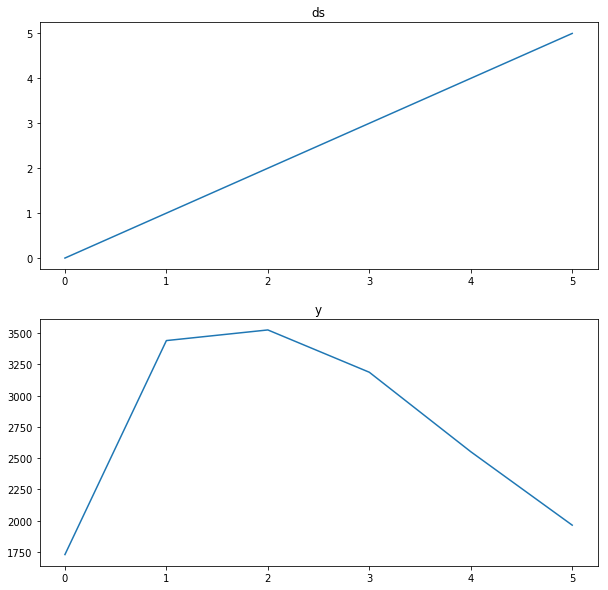

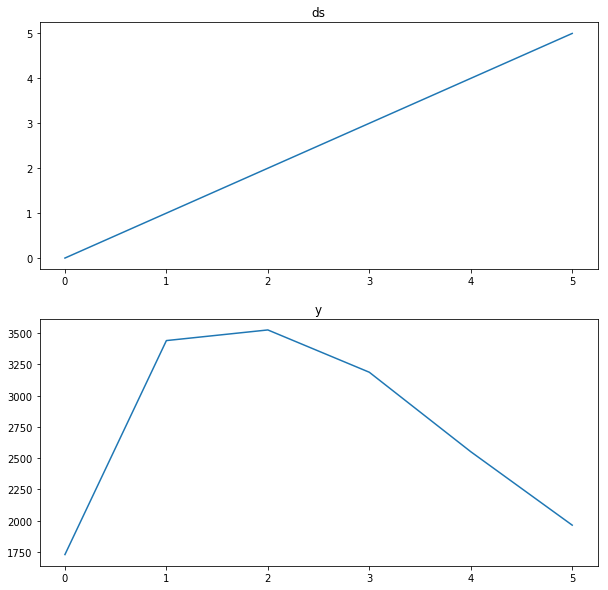

In [7]:
result.plot()

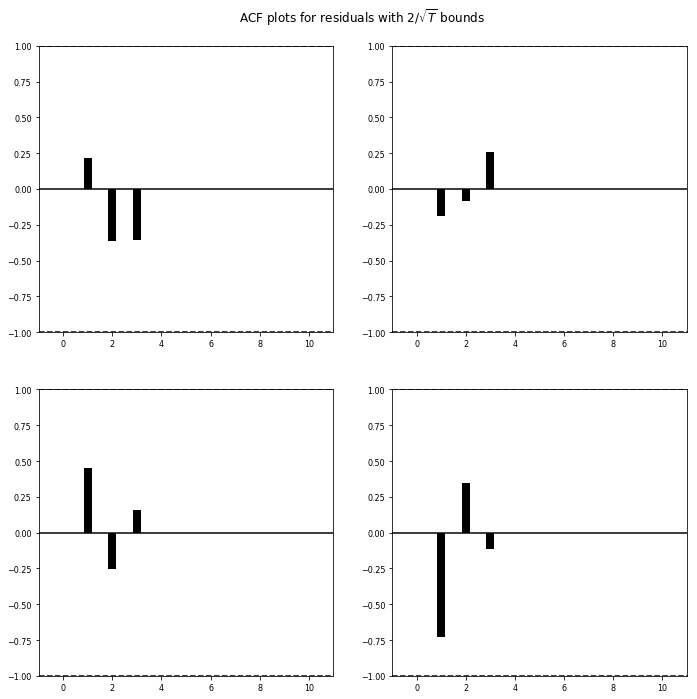

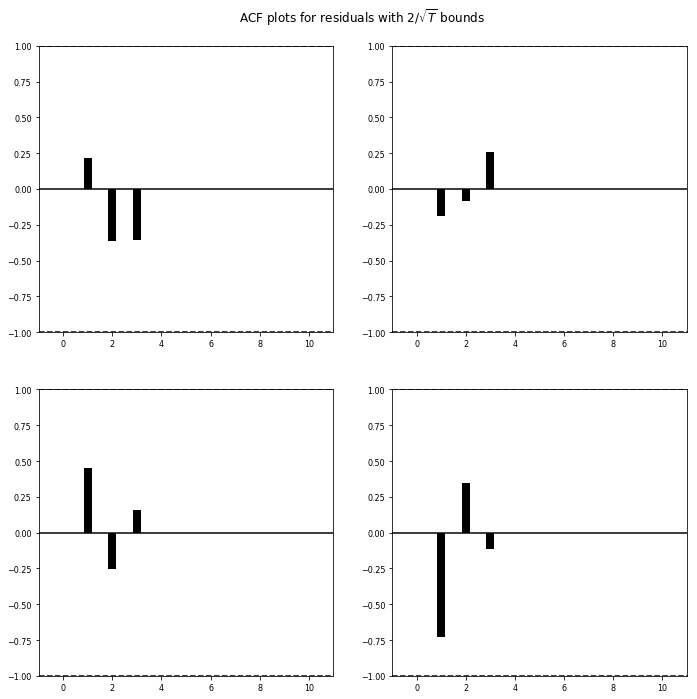

In [8]:
result.plot_acorr()

In [9]:
lag_order = result.k_ar
result.forecast(df.values[-lag_order:], 2)

array([[   6.        , 1238.69508654],
       [   7.        ,  623.27568962]])

/Users/kessapassa/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:1102: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(self._forecast_vars(steps))


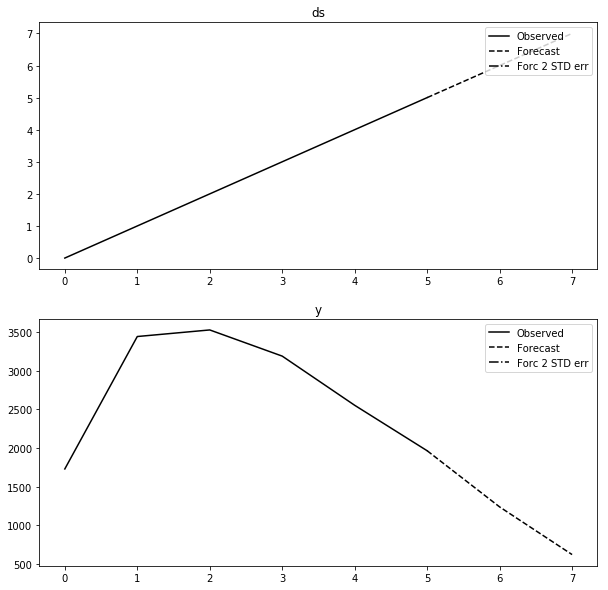

In [10]:
result.plot_forecast(2)
plt.savefig('VAR440_census.png')